</font><font color='Black'><b>Описание проекта</b></font><br>
<font color='Black'>Есть интернет-магазин, который заниамется продажей игр. Есть определенные связанные с ним данные - продажи, жанры, платформы и т.д. Наша цель - определение закономерностей, по которым можно определить успешность продукта и, соответственно, целесообразность финансирования его рекламных кампаний.
    <br> План таков: загрузим необходимые библиотеки, проведем предобработку данных, после чего выполнил ряд аналитических процедур. Также составим портреты пользователей по регионам и сперва сформулируем, а затем проверим две теории, связанные со средним пользовательским рейтингом двух платформ и двух жанров.
     <br> По возможности будем прикреплять к работе графические материалы, полученные с помощью используемых данных.

# 1. Загрузка библиотек и данных

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Цель раздела - загрузить библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-info">
<font size="4", color= "black"><b>Промежуточный вывод</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Имеем таблицу с данными размеров 16715 х 10, в некоторых ячейках видимо пропуски, особенно много их в столбце "Rating", "Critic_Score" и "User_Score". Также видим два пропуска в столбеце "Name", принимаем эту деталь во внимание. 
<br>
<br>Строки с пропущенными названиями точно можно удалить. В дальнейшем анализе смысла от них не будет и их очень мало, их исключение не повлияет на дальнейшие результаты
        <br>
<br>Почему вообще могли возникнуть те или иные пропуски? Основная масса пропусков находится в столбцах, связанных с рейтингами и оценками - скорее всего в данных большая доля noname-игр, которые просто не дошли до рейтинговых агентств и на которые люди не оставили свои оценки 

# 2. Подготовка данных

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Раздел посвящен работе с первичными данными и приведению их в подобающий вид. Цель - избавиться от дубликатов, если они есть, привести данные к необходимому типу данных, если это требуется

# 2.1 Приведение к нижнему регистру

In [3]:
# Приведение названий столбцов к нижнему регистру

data.columns = data.columns.str.lower()

In [4]:
# Проверка

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2.2 Поиск и замена пропусков

In [5]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
data = data.loc[(data['name'].notna())&(data['genre'].notna())]

In [7]:
# Проверка

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
# Поиск уникальных годов релиза игр

data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Есть всего 2 пропуска в названиях и жанре игр, удалим их. Теперь попробуем провести предобработку данных, поищем явные и неявные дубликаты и удалим их в случае необходимости.

In [9]:
data['name'].value_counts()

Need for Speed: Most Wanted                        12
FIFA 14                                             9
Ratatouille                                         9
LEGO Marvel Super Heroes                            9
Madden NFL 07                                       9
                                                   ..
Pokemon Art Academy                                 1
Battle Hunter                                       1
Mega Man Battle Network 2                           1
Fatal Fury: Battle Archives Volume 1 (JP sales)     1
Paper Mario: Sticker Star                           1
Name: name, Length: 11559, dtype: int64

In [10]:
data['name'].sort_values(ascending=True).head(30)

14983                                 Beyblade Burst
1079                               Fire Emblem Fates
3358                            Frozen: Olaf's Quest
3862                            Frozen: Olaf's Quest
13794                     Haikyu!! Cross Team Match!
2454                               Tales of Xillia 2
4728                                     '98 Koshien
8342                      .hack//G.U. Vol.1//Rebirth
7087                    .hack//G.U. Vol.2//Reminisce
8597         .hack//G.U. Vol.2//Reminisce (jp sales)
8293                   .hack//G.U. Vol.3//Redemption
1561                         .hack//Infection Part 1
9063                                     .hack//Link
2990                          .hack//Mutation Part 2
4265                          .hack//Outbreak Part 3
7992     .hack//Quarantine Part 4: The Final Chapter
14329              .hack: Sekai no Mukou ni + Versus
3757                                      007 Racing
3120                          007: Quantum of 

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Целью этого действия было попробовать найти какие-нибудь странности в данных.
<br> Я решил попробовать поискать дубли и аномалии по столбцам, в который есть слова, потому что мы, возможно, найдем что-нибудь типа "need for speed" и "need for sped" и тому подобное, т.е. опечатки, ошибки. 
<br>Некоторые названия действительно выглядят странно, особенно те, что в верхней части выведенной выше таблицы, но что с ними делать - непонятно, не думаю, что исключать их хорошая идея. При этом у нас более 11 тысяч оригинальных названий, все мы просто не сможем просмотреть, двигаемся дальше.

In [11]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Здесь криминала не найдено.
         <br> Поищем теперь явные дубликаты

In [12]:
data.duplicated().sum()

0

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Явных дубликатов нет, что ж, это хорошо

In [13]:
# Доля пропусков в столбце годов релиза

print('% пропусков в столбце годов релиза:', len(data[data['year_of_release'].isna()])/len(data['year_of_release'])*100)

% пропусков в столбце годов релиза: 1.6095255190570215


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Пропуски составляют менее 2% от всего столбца 'year_of_release', исключение такого объема данных не приведет к фундаментальным изменениям, поэтому удаляем их

# 2.3 Изменение типов данных и некоторых значений

In [14]:
# data['year_of_release'] = data['year_of_release'].fillna(0).apply(int)

data = data.loc[data['year_of_release'].notna()]
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [15]:
len(data[data['user_score']=='tbd']) / len(data['user_score'])

0.14449039163220628

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>'tbd' подразумевает, что оценки еще нет. Заменять средним или медианой - плохой вариант, т.к. это может сильно сказаться далее при поиске связей.
    <br> Зачем вообще проводить подобную замену? Потому что исходный тип данных в столбце 'user_score' - object, будто это слова, хотя здесь явно больше подходят цифры. Логичнее было бы перевести во float, а этому препятствуют 'tbd'. Получается, что правильнее всего будет сперва заменить их пропусками, после чего поменять тип данных на float, что мы сейчас и сделаем.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)

In [17]:
# проверка

data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
# проверка

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Интернет пишет следующее:

1. EC - для самых маленьких, тех, кто только научился держать джойстик.
2. Е - базовый рейтинг для всех возрастов.
3. Е10+ - для детей от 10 лет.
4. K-A - то же, что и Е. В 1998 был переименован в Е.
5. Т - для подростков от 13 лет.
6. М - от 17 лет.
7. АО - 18+ лет, самые жесткие игры.
8. RP - ожидание рейтинга. Появлятеся с рекламой игр, которые еще не оценили
<br>'K-A' это первоначальная вариация 'E' по ESRB, поэтому заменяем

In [19]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [21]:
data['rating'] = data['rating'].fillna('Рейтинг не определен')

In [22]:
# Проверка

data['rating'].unique()

array(['E', 'Рейтинг не определен', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Какие могут быть причины пропусков? В столбцах, где отзывы критиков и пользователей, например, могло не набраться достаточного кол-ва отзывов, чтоб дать адекватную оценку, особенно, если это игра-ноунейм. Там, где было 'tbd', видимо, как раз шел процесс набора и подсчета голосов для дачи оценки в будущем. Что касается пропусков в названии и жанре, то там вообще никакой информации кроме названия платформы и продаж нет, возможно это ошибка, человеческих фактор, а возможно, что официальные названия эти игры так и не получили

In [23]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>По 25-му процентилю видно, что по многим играм нулевые продажи. Не знаю что с этим делать, поэтому оставлю как есть.
        <br> А так видно, что самые серьезные продажи идут в Северной Америке, что неудивительно

In [24]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Рейтинг не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Рейтинг не определен,31.38


# 3. Исследовательский анализ

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Начнем анализ с подсчета выпуска игр по годам

# 3.1 Подсчет выпуска игр по годам

In [27]:
data.pivot_table(index='year_of_release',
                 values='name',
                 aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Бум выпуска игр пришелся на конец 2000-х годов, с 2006 до 2011 года выпускали более 1000 игр, после чего идет спад. 
        <br> Какая может быть причина такого резкого спада? Я могу назвать две основные, на мой взгляд причины:
        <br> - В первую очередь это развитие мобильных устройств. Телефоны превратились из кирпичей с кнопками в портативные компьютеры, появился целый новый рынок мобильных игр и приложений, сюда наложилось развитие соцсетей и интернета, люди начали смотреть кино, мемы, зависать в инстаграмах и т.д. Люди просто начали отходить от игр в приставки.
        <br> - Вторая возможная причина - игры стали гораздо сложнее, их бюджеты сильно выросли, от них ожидается сильный результат, поэтому компании-игроделы начали работать не на количество, а на качество и наполнение игр. Ту же GTA 6 ждут уже более 10 лет и ожидают от нее чего-то гениального. Всякий шлак штамповать смысла нет, т.к. оно просто не потянет конкуренцию с мобильными играми, поэтому делают теперь такое, что точно нельзя выпустить на телефон.
        <br>Теперь посмотрим на графики выпущенных игр по годам на разные платформы

<AxesSubplot:title={'center':'Кол-во выпущенных игр по годам'}, xlabel='Год', ylabel='Кол-во выпущенных игр'>

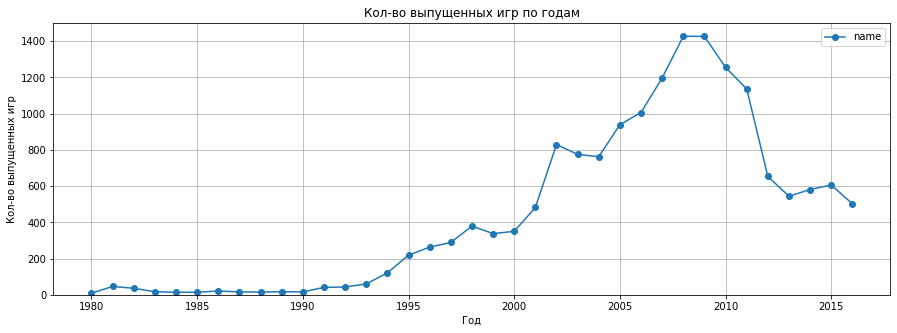

In [28]:
data.query('year_of_release != 0').pivot_table(index='year_of_release',
                                               values='name',
                                               aggfunc='count').plot(grid=True, 
                                                                     style='o-',
                                                                     figsize=(15, 5),
                                                                     title='Кол-во выпущенных игр по годам',
                                                                     ylabel='Кол-во выпущенных игр', 
                                                                     xlabel='Год',
                                                                     ylim=(0, 1500)  
)

# 3.2 Продажи по платформам

In [29]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
data.groupby('platform').agg({'all_sales': ['sum', 'count']}).sort_values(('all_sales', 'sum'), ascending = False)

all_sales      
               sum count
platform                
PS2        1233.56  2127
X360        961.24  1232
PS3         931.34  1306
Wii         891.18  1286
DS          802.78  2121
PS          727.58  1190
PS4         314.14   392
GBA         312.88   811
PSP         289.53  1193
3DS         257.81   512
PC          255.76   957
GB          254.43    97
XB          251.57   803
NES         251.05    98
N64         218.01   316
SNES        200.04   239
GC          196.73   542
XOne        159.32   247
2600         86.48   116
WiiU         82.19   147
PSV          53.81   429
SAT          33.59   173
GEN          28.35    27
DC           15.95    52
SCD           1.86     6
NG            1.44    12
WS            1.42     6
TG16          0.16     2
3DO           0.10     3
GG            0.04     1
PCFX          0.03     1

<AxesSubplot:title={'center':'Суммарные продажи игр по платформам, млн. шт.'}, xlabel='Платформа', ylabel='Суммарные продажи, млн. шт.'>

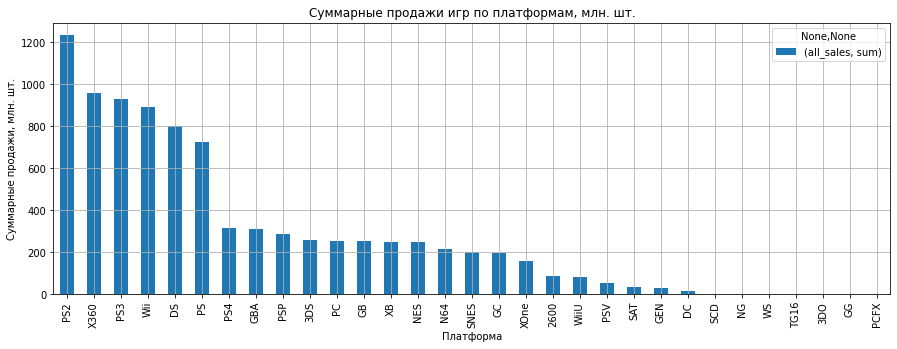

In [31]:
data.groupby('platform').agg({'all_sales': ['sum']}).sort_values(('all_sales', 'sum'), ascending = False) \
.plot(kind='bar', figsize=(15,5), grid=True, title='Суммарные продажи игр по платформам, млн. шт.', xlabel='Платформа',
     ylabel='Суммарные продажи, млн. шт.')

In [32]:
top_ten_plat = data.groupby('platform').agg({'all_sales': ['sum', 'count']}) \
.sort_values(('all_sales', 'sum'), ascending = False).head(10)
top_ten_plat

all_sales      
               sum count
platform                
PS2        1233.56  2127
X360        961.24  1232
PS3         931.34  1306
Wii         891.18  1286
DS          802.78  2121
PS          727.58  1190
PS4         314.14   392
GBA         312.88   811
PSP         289.53  1193
3DS         257.81   512

<AxesSubplot:title={'center':'Суммарные продажи игр по тор-10 платформам, млн. шт.'}, xlabel='Платформа', ylabel='Суммарные продажи, млн. шт.'>

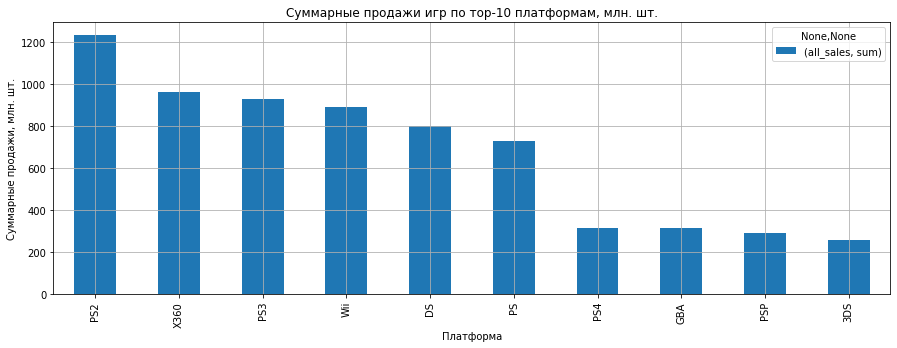

In [33]:
 data.groupby('platform').agg({'all_sales': ['sum']}) \
.sort_values(('all_sales', 'sum'), ascending = False).head(10)\
.plot(kind='bar', figsize=(15,5), grid=True, title='Суммарные продажи игр по тор-10 платформам, млн. шт.', xlabel='Платформа',
     ylabel='Суммарные продажи, млн. шт.')

<AxesSubplot:title={'center':'Продажи PS2 по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

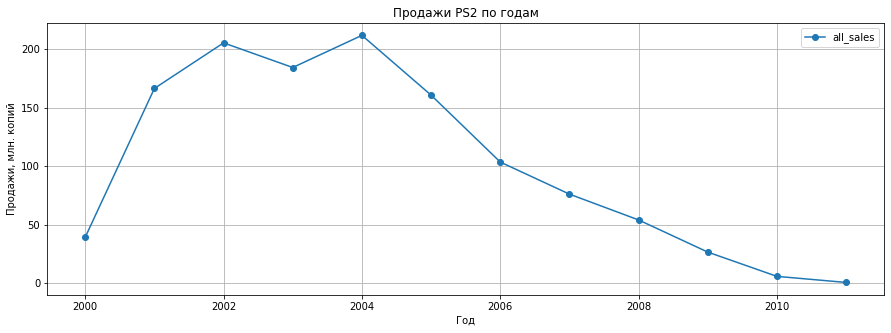

In [34]:
(
data.query('platform == "PS2"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи PS2 по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год',
                                                               
                                                               
)
)

<AxesSubplot:title={'center':'Продажи X360 по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

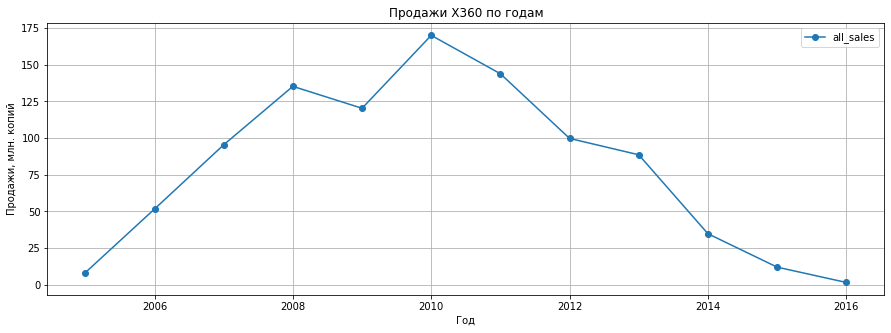

In [35]:
(
data.query('platform == "X360"').pivot_table(index='year_of_release',
                                             values='all_sales',
                                             aggfunc='sum').plot(grid=True, 
                                                                 style='o-',
                                                                 figsize=(15, 5),
                                                                 title='Продажи X360 по годам',
                                                                 ylabel='Продажи, млн. копий', 
                                                                 xlabel='Год'
                                                               
                                                               
)
)

<AxesSubplot:title={'center':'Продажи PS3 по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

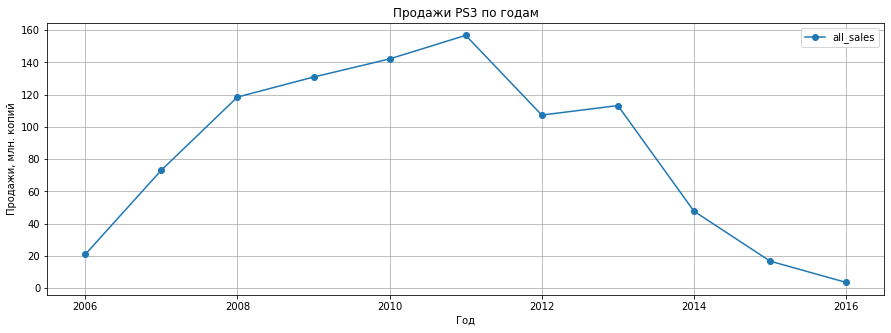

In [36]:
(
data.query('platform == "PS3"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи PS3 по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год'
                                                               
                                                               
)
)

<AxesSubplot:title={'center':'Продажи Wii по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

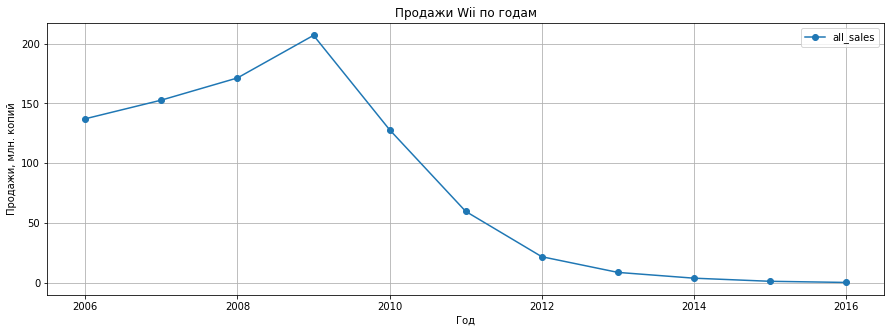

In [37]:
(
data.query('platform == "Wii"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи Wii по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год'
                                                               
                                                               
)
)

<AxesSubplot:title={'center':'Продажи DS по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

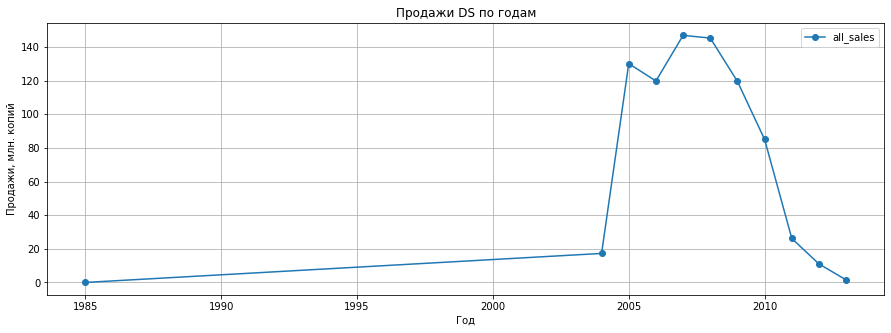

In [38]:
(
data.query('platform == "DS"').pivot_table(index='year_of_release',
                                           values='all_sales',
                                           aggfunc='sum').plot(grid=True, 
                                                               style='o-',
                                                               figsize=(15, 5),
                                                               title='Продажи DS по годам',
                                                               ylabel='Продажи, млн. копий', 
                                                               xlabel='Год'
                                                               
                                                               
)
)

In [39]:
data.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Рейтинг не определен,0.02


<AxesSubplot:title={'center':'Продажи PS по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

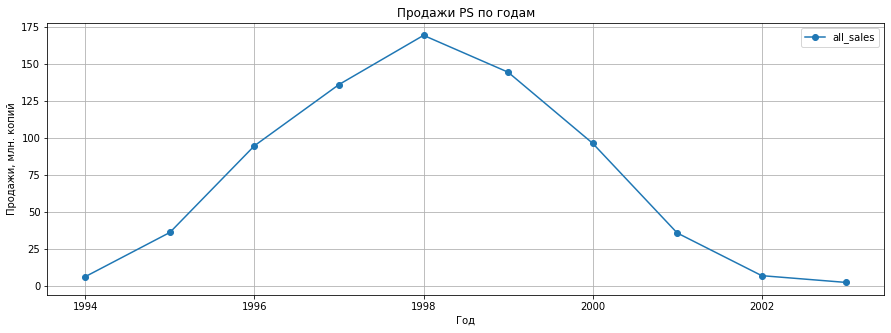

In [40]:
(
data.query('platform == "PS"').pivot_table(index='year_of_release',
                                           values='all_sales',
                                           aggfunc='sum').plot(grid=True, 
                                                               style='o-',
                                                               figsize=(15, 5),
                                                               title='Продажи PS по годам',
                                                               ylabel='Продажи, млн. копий', 
                                                               xlabel='Год'
                                                               
                                                               
)
)

<AxesSubplot:title={'center':'Продажи GBA по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

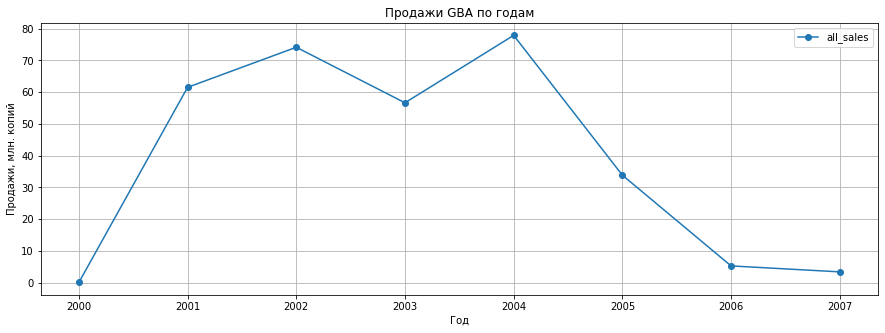

In [41]:
(
data.query('platform == "GBA"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи GBA по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год'
                                                               
                                                               
)
)

In [42]:
data.query('platform == "GBA" & year_of_release == 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
12300,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,0.05,0.02,0.0,0.0,NaN,NaN,Рейтинг не определен,0.07


<AxesSubplot:title={'center':'Продажи PS4 по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

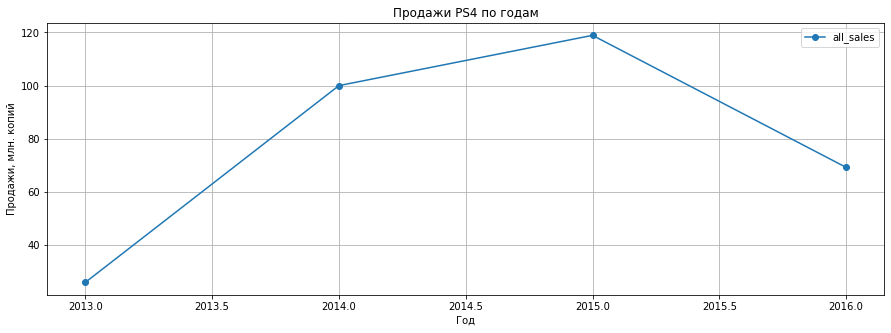

In [43]:
(
data.query('platform == "PS4"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи PS4 по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год'
                                                                                                                              
)
)

<AxesSubplot:title={'center':'Продажи PSP по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

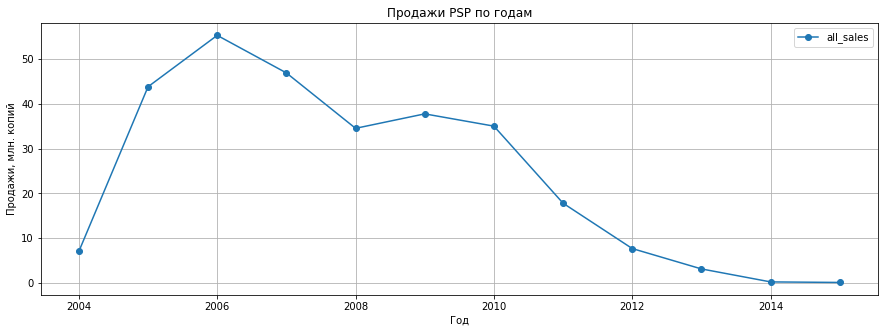

In [44]:
(
data.query('platform == "PSP"').pivot_table(index='year_of_release',
                                            values='all_sales',
                                            aggfunc='sum').plot(grid=True, 
                                                                style='o-',
                                                                figsize=(15, 5),
                                                                title='Продажи PSP по годам',
                                                                ylabel='Продажи, млн. копий', 
                                                                xlabel='Год'
                                                                                                                              
)
)

In [45]:
data.query('platform == "PSP" & year_of_release == 2015')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
11486,Uta no Prince-Sama: All Star After Secret,PSP,2015,Action,0.0,0.0,0.08,0.0,NaN,NaN,Рейтинг не определен,0.08
15996,Harukanaru Toki no Naka de 6,PSP,2015,Action,0.0,0.0,0.02,0.0,NaN,NaN,Рейтинг не определен,0.02
16069,Meiji Toukyou Renka: Twilight Kiss,PSP,2015,Action,0.0,0.0,0.02,0.0,NaN,NaN,Рейтинг не определен,0.02


<AxesSubplot:title={'center':'Продажи PC по годам'}, xlabel='Год', ylabel='Продажи, млн. копий'>

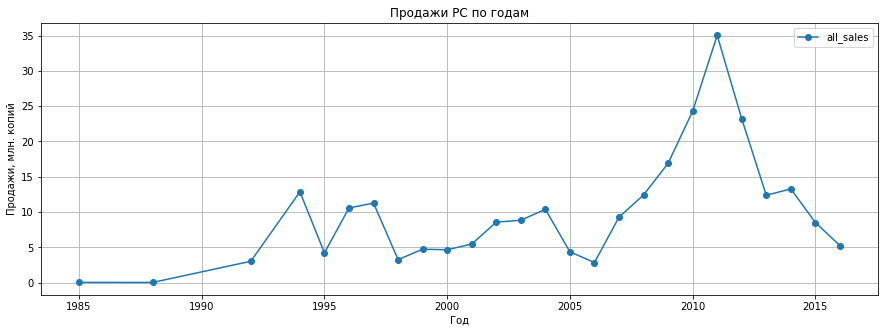

In [46]:
(
data.query('platform == "PC"').pivot_table(index='year_of_release',
                                           values='all_sales',
                                           aggfunc='sum').plot(grid=True, 
                                                               style='o-',
                                                               figsize=(15, 5),
                                                               title='Продажи PC по годам',
                                                               ylabel='Продажи, млн. копий', 
                                                               xlabel='Год'
                                                                                                                              
)
)

In [47]:
data.query('platform == "PC" & year_of_release >= 1985 & year_of_release <= 1990')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14470,Alter Ego,PC,1985,Simulation,0.0,0.03,0.0,0.01,59.0,5.8,T,0.04
14621,SimCity,PC,1988,Simulation,0.0,0.02,0.0,0.01,64.0,2.2,E10+,0.03


In [48]:
data_PS2 = data.loc[data['platform']=='PS2'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_X360 = data.loc[data['platform']=='X360'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_PS3 = data.loc[data['platform']=='PS3'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_Wii = data.loc[data['platform']=='Wii'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_DS = data.loc[data['platform']=='DS'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_PS = data.loc[data['platform']=='PS'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_GBA = data.loc[data['platform']=='GBA'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_PS4 = data.loc[data['platform']=='PS4'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_PSP = data.loc[data['platform']=='PSP'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]
data_PC = data.loc[data['platform']=='PC'].groupby('year_of_release').agg({'all_sales': ['sum']})[1:]

Text(0.5, 1.0, 'График топ-10 платформ по продажам по годам')

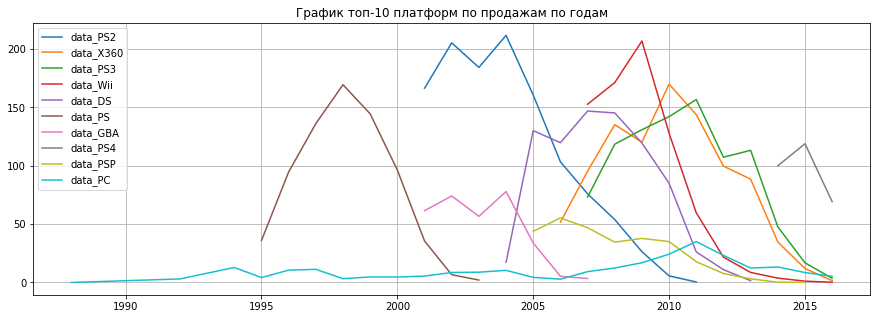

In [49]:
plt.figure(figsize = (15,5))

plt.grid(True)
plt.plot(data_PS2, label = 'data_PS2')
plt.plot(data_X360, label = 'data_X360')
plt.plot(data_PS3, label = 'data_PS3')
plt.plot(data_Wii, label = 'data_Wii')
plt.plot(data_DS, label = 'data_DS')
plt.plot(data_PS, label = 'data_PS')
plt.plot(data_GBA, label = 'data_GBA')
plt.plot(data_PS4, label = 'data_PS4')
plt.plot(data_PSP, label = 'data_PSP')
plt.plot(data_PC, label = 'data_PC')

plt.legend()

plt.title('График топ-10 платформ по продажам по годам')

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Цель последнего сводного графика - посмотреть какие платформы в какие годы преобладали.
        <br> Видно, что у каждой платформы были свои "золотые" годы. Из топ-10 самых прибыльных платформ можно выделить PS4 - в силу того, что по условию данные за 2016 неполные, то можно предположить, что дела у этой платформы лучше, чем у остальных, но сейчас, в 2023 году, когда известно, что уже есть, как минимум, PS5, то на текущий момент у нее был бы такой график, как у остальных

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Цель последнего сводного графика - посмотреть какие платформы в какие годы преобладали.
        <br> Итак, если мы хотим дать какой-то более-менее адекватный прогноз касательно перспективных платформ, то надо брать данные не ранее, чем за 2012-2013 годы

# 3.3 Выбор актуального периода

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Рынок постоянно меняется, это необходимо учитывать. Парадигма существенно изменилась после 2011 года, достижения и объемы рынка игровых платформ середины 2000-х и 2010-х гг. это два разных рынка, незачем опираться на неактуальные данные, сократим наш датафрейм - оставим информацию только после 2012 года включительно

In [50]:
data = data.query('year_of_release >= 2012')

# 3.4 Оценка разброса значений

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Построим диаграмму размаха. Для чего это нужно - чтобы понять у каких платформ наибольший разброс по продажам игр. Чем выше граница графика (чем длиннее "ус"), тем больше выбивающихся из общей концепции значений. Соответственно задача - оценить разброс по продаж по платформам

(0.0, 2.0)

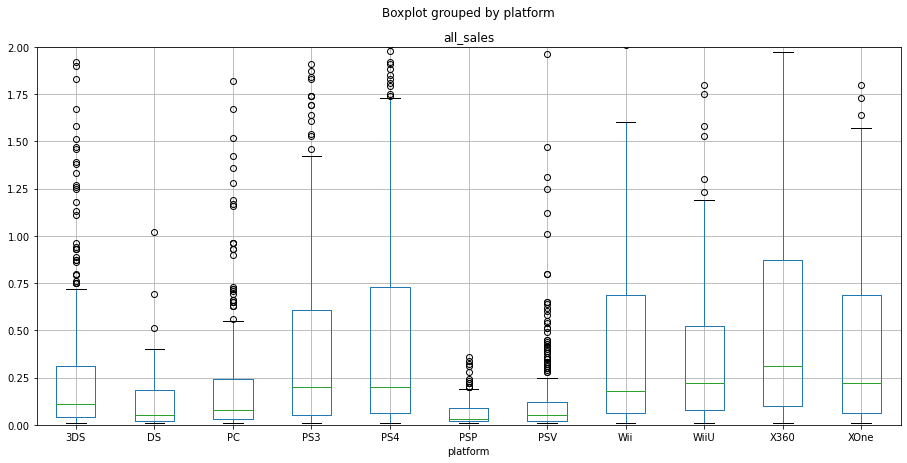

In [51]:
data.boxplot(column = 'all_sales', by = 'platform', figsize=(15, 7)).set_ylim(0, 2)

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Построили диаграмму размаха, нижняя и верхняя границы ящика показывают 25-% и 75-% квартили соответственно, то есть отсекают по 25% значений сверху и снизу, в ящике находится 50% значений продаж по каждой платформе. Зеленая линия внутри - медианное значение, которое делит пополам совокупности значений.

# 3.5 Диаграммы рассеяния

In [52]:
data['critic_score'].unique()

array([97., nan, 83., 73., 78., 87., 71., 88., 82., 85., 74., 86., 95.,
       76., 93., 84., 81., 90., 77., 80., 92., 70., 72., 79., 75., 91.,
       66., 89., 67., 57., 68., 65., 55., 63., 54., 61., 94., 33., 64.,
       60., 69., 59., 52., 96., 53., 62., 48., 50., 32., 43., 56., 34.,
       58., 47., 46., 31., 49., 40., 39., 51., 36., 23., 45., 42., 38.,
       24., 19., 44., 20., 25., 35., 13., 37., 26.])

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Построим диаграммы рассеяния по отзывам критиков и оценкам пользователей и суммарным продажам для платформы PS4

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Отзывы критиков'>],
      dtype=object)

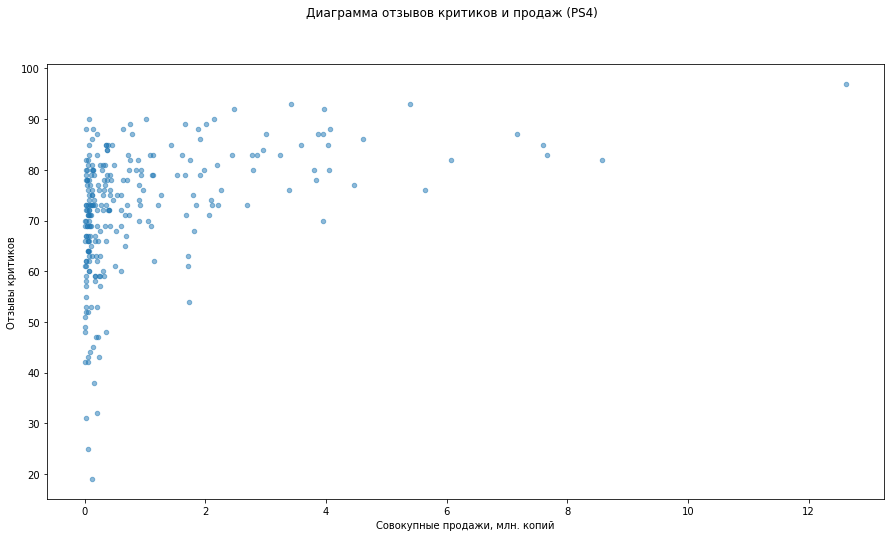

In [53]:
data.query('platform == "PS4"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (PS4)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Отзывы критиков')

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Полученное распределение показывает, что в целом игры с хорошими отзывами критиков необязательно имеют какой-то существенный финансовый успех. Очень много игр с хорошими отзывами не смогли преодолеть отметку даже в 500 000 проданных копий. При этой среди самых продаваемых игр отзывы в основном хорошие - выше 70. У самой продаваемой игры оценка стремится к 100.

<div class="alert alert-info">
<font size="4", color= "black"><b>Пояснение</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Не хочется удалять строки с 'tbd' и 'nan' в столбце 'user_score', они понадобятся для дальнейшего анализа, поэтому сделаем копию датафрейма без пустых значений и 'tbd' в данном столбце и воспользуемся ею для построения диаграммы рассеяния

In [54]:
#data_fl = data.query('user_score != "tbd" & user_score.notna()')
#data_fl['user_score'] = data_fl['user_score'].astype(float)

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

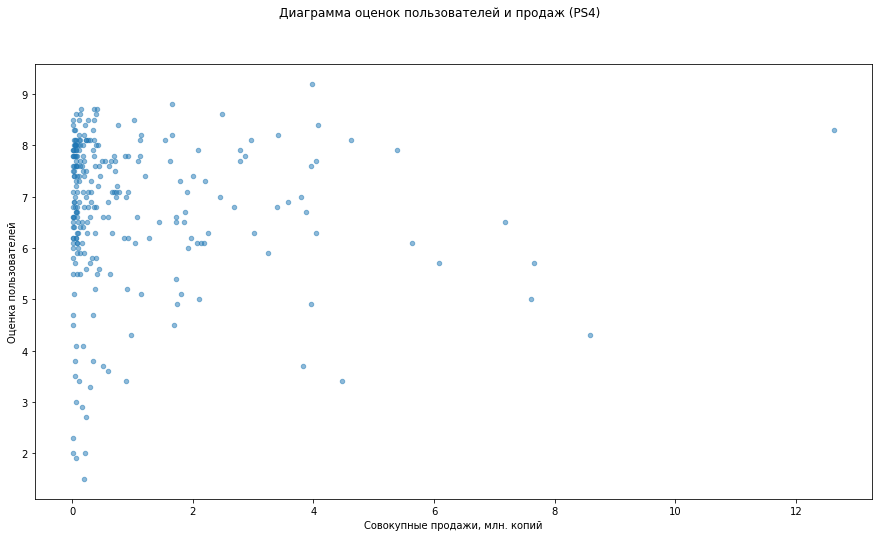

In [55]:
data.query('platform == "PS4"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (PS4)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Полученное распределение имеет схожие тенденции с предыдущим - много хорошо оценных игр показали низкие продажи. Среди самых продаваемых игр в основном хорошие оценки

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Посчитаем корреляцию для продаж и отзывов и оценок для PS4. Условия те же

In [56]:
print('Взаимосвязь отзывов критиков и продаж игр на PS4:', 
      round(data.query('platform == "PS4"')['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр на PS4:', 
      round(data.query('platform == "PS4"')['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр на PS4: 0.407
Взаимосвязь оценок пользователей и продаж игр на PS4: -0.032


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Как видно из полученных коэффициентов Пирсона, особо сильной связи между продажами и отзывами критиков и пользователей нет

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Сделаем всё то же самое для Х360

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка критиков'>],
      dtype=object)

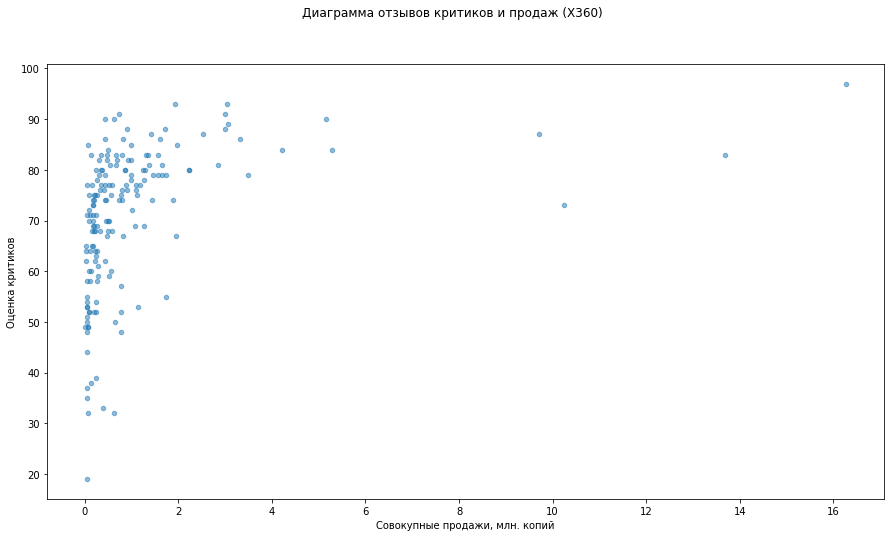

In [57]:
data.query('platform == "X360"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (X360)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка критиков')

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

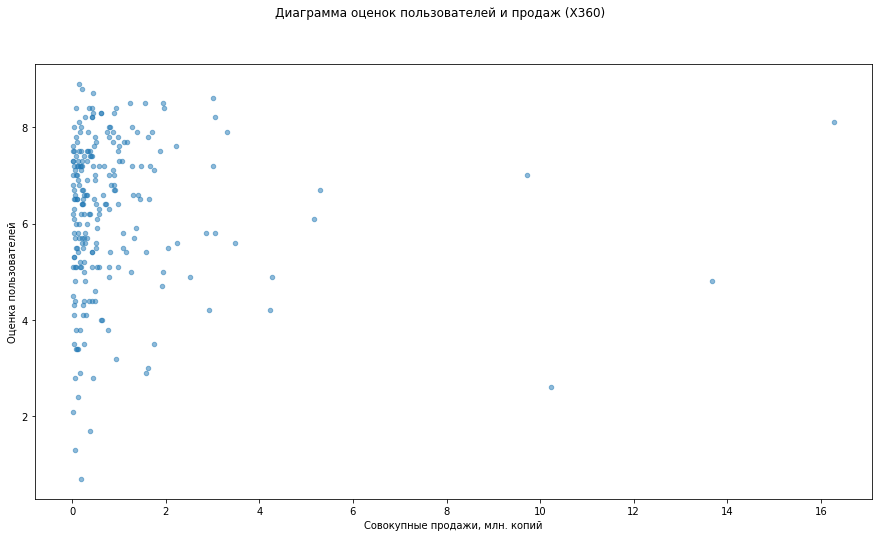

In [58]:
data.query('platform == "X360"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (X360)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

In [59]:
print('Взаимосвязь отзывов критиков и продаж игр для Х360:', 
      round(data.query('platform == "X360"')['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр на Х360:', 
      round(data.query('platform == "X360"')['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр для Х360: 0.361
Взаимосвязь оценок пользователей и продаж игр на Х360: 0.006


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Теперь для PS3

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка критиков'>],
      dtype=object)

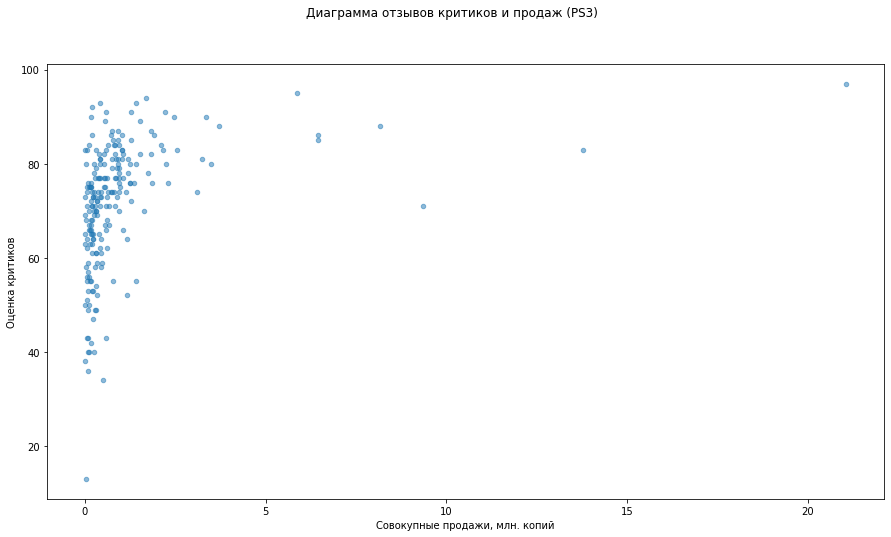

In [60]:
data.query('platform == "PS3"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (PS3)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка критиков')

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

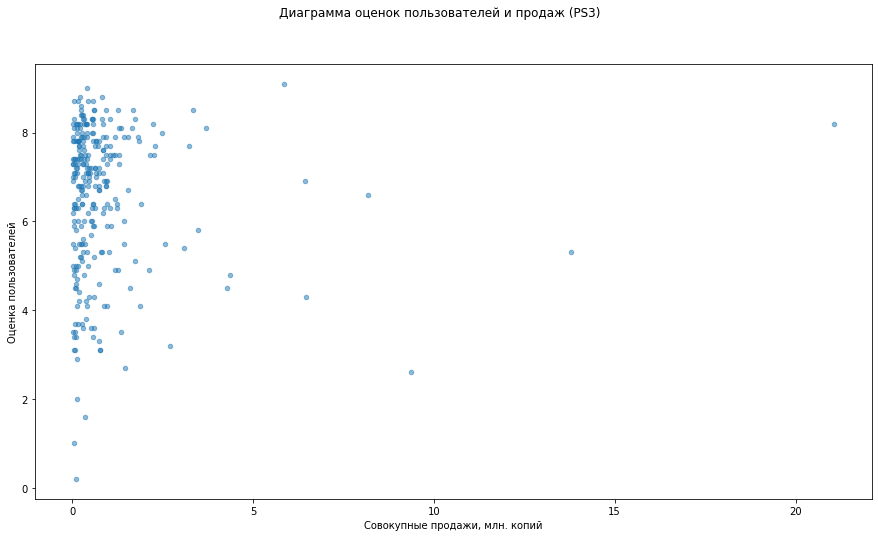

In [61]:
data.query('platform == "PS3"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (PS3)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

In [62]:
print('Взаимосвязь отзывов критиков и продаж игр для PS3:', 
      round(data.query('platform == "PS3"')['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр для PS3:', 
      round(data.query('platform == "PS3"')['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр для PS3: 0.331
Взаимосвязь оценок пользователей и продаж игр для PS3: -0.005


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Теперь для Wii

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка критиков'>],
      dtype=object)

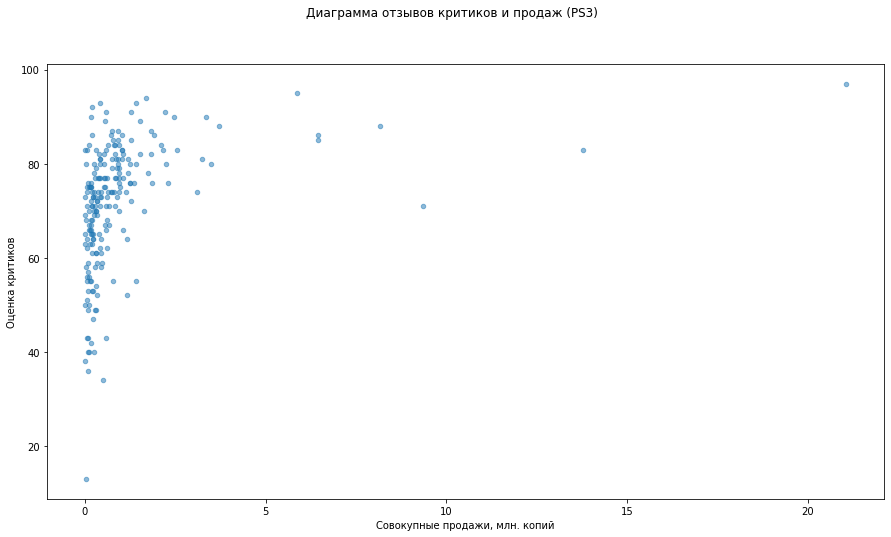

In [63]:
data.query('platform == "PS3"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (PS3)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка критиков')

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

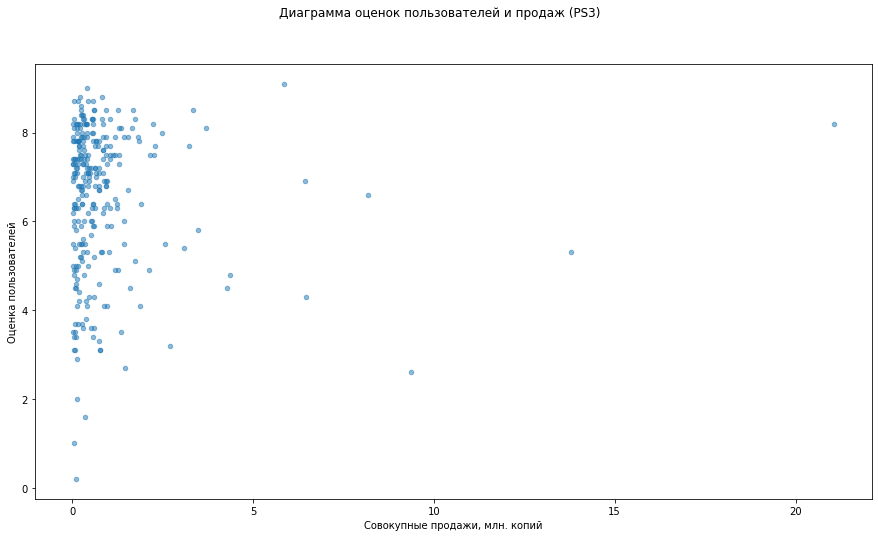

In [64]:
data.query('platform == "PS3"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (PS3)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

In [65]:
print('Взаимосвязь отзывов критиков и продаж игр для Wii:', 
      round(data.query('platform == "Wii"')['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр для Wii:', 
      round(data.query('platform == "Wii"')['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр для Wii: -0.424
Взаимосвязь оценок пользователей и продаж игр для Wii: 0.296


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Теперь для PC

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка критиков'>],
      dtype=object)

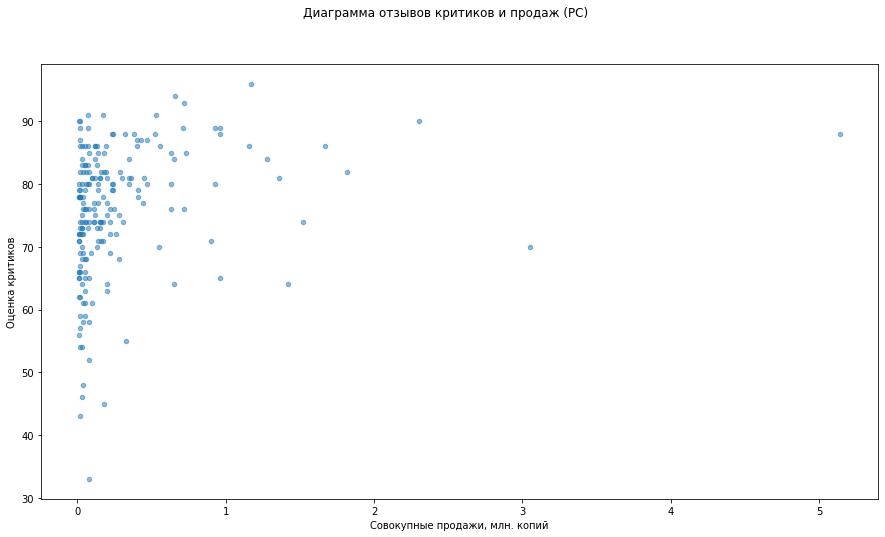

In [66]:
data.query('platform == "PC"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (PC)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка критиков')

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

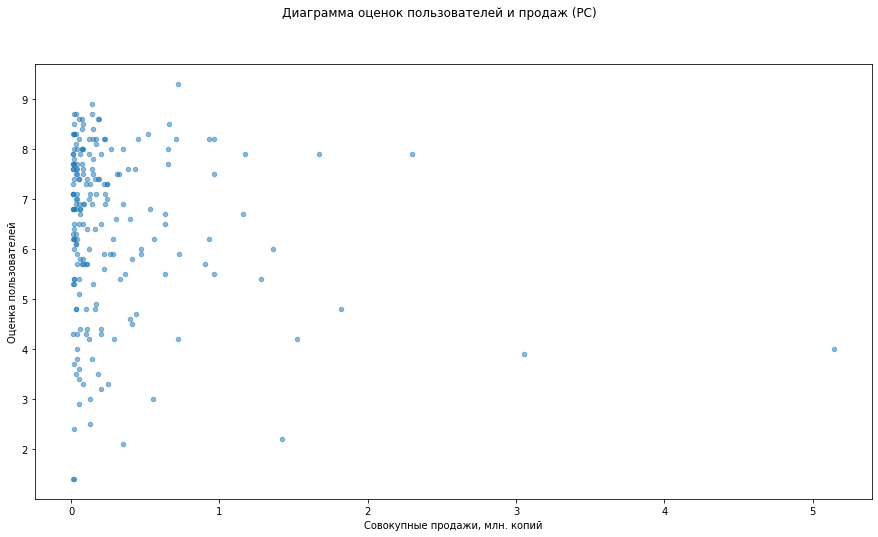

In [67]:
data.query('platform == "PC"') \
.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
      alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (PC)',
      xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

In [68]:
print('Взаимосвязь отзывов критиков и продаж игр для PC:', 
      round(data.query('platform == "PC"')['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр для PC:', 
      round(data.query('platform == "PC"')['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр для PC: 0.237
Взаимосвязь оценок пользователей и продаж игр для PC: -0.122


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Теперь сделаем две такие же диаграммы и посчитаем коэффициенты корреляции для всех платформ

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка критиков'>],
      dtype=object)

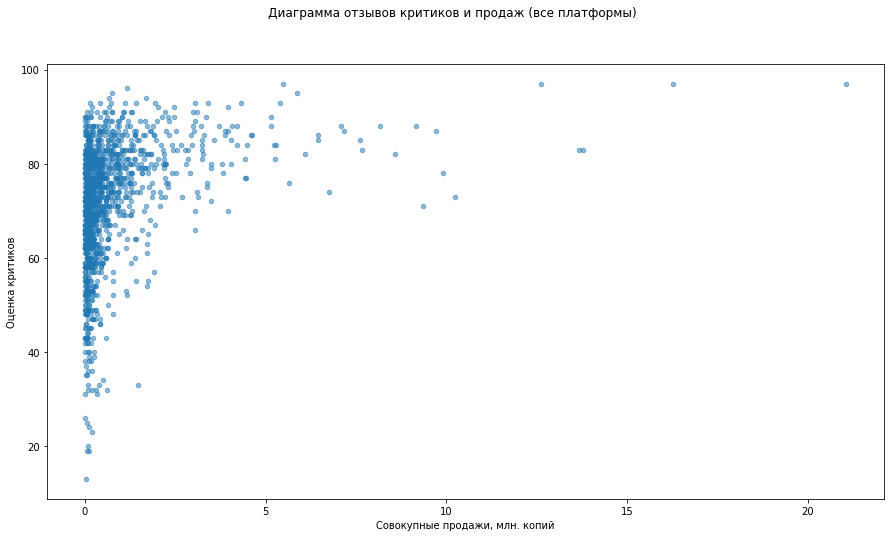

In [69]:
data.plot(kind = 'scatter', x = 'all_sales', y = 'critic_score', 
          alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма отзывов критиков и продаж (все платформы)',
          xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка критиков')

array([<AxesSubplot:xlabel='Совокупные продажи, млн. копий', ylabel='Оценка пользователей'>],
      dtype=object)

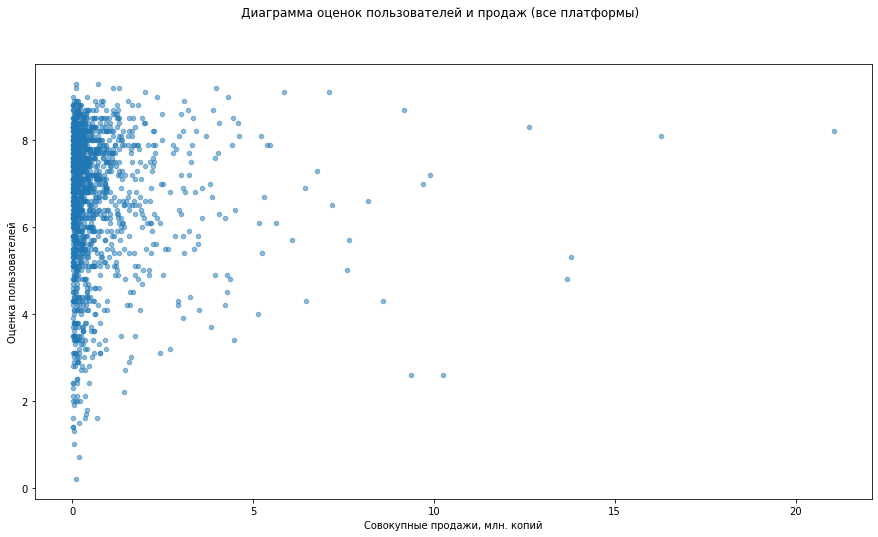

In [70]:
data.plot(kind = 'scatter', x = 'all_sales', y = 'user_score', 
     alpha = 0.5, subplots=True, figsize=(15,8), title = 'Диаграмма оценок пользователей и продаж (все платформы)',
     xlabel = 'Совокупные продажи, млн. копий', ylabel = 'Оценка пользователей')

In [71]:
print('Взаимосвязь отзывов критиков и продаж игр для всех платформ:', 
      round(data['all_sales'].corr(data['critic_score']), 3))
print('Взаимосвязь оценок пользователей и продаж игр для всех платформ:', 
      round(data['all_sales'].corr(data['user_score']), 3))

Взаимосвязь отзывов критиков и продаж игр для всех платформ: 0.308
Взаимосвязь оценок пользователей и продаж игр для всех платформ: 0.004


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Из полученных диаграмм видно, что в целом критики более лояльны в своих оценках, чем пользователи. В диаграммах по пользователям немного больше более низких оценок, чем в диаграммах по критикам. Коэффициенты Пирсона для рассмотренных платформ не выявили каких-либо серьезных связей

# 3.6 Распределение игр по жанрам

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Найдем самые кассовые жанры игр

In [72]:
data.pivot_table(index='genre',
                 values='all_sales',
                 aggfunc='sum').sort_values(['all_sales'], ascending = False)

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<div class="alert alert-info">
<font size="4", color= "black"><b>Промежуточный вывод</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Самыми кассовыми жанрами оказались action, shooter, role-playing и sport, они идут с солидным отрывом

In [73]:
data.groupby('genre').agg({'all_sales': ['median', 'sum', 'count']}) \
.sort_values(('all_sales', 'median'), ascending = False).head()

all_sales              
                median     sum count
genre                               
Shooter           0.44  304.73   235
Sports            0.24  181.07   268
Platform          0.21   61.00    85
Role-Playing      0.14  192.80   370
Racing            0.14   53.50   115

(0.0, 0.6)

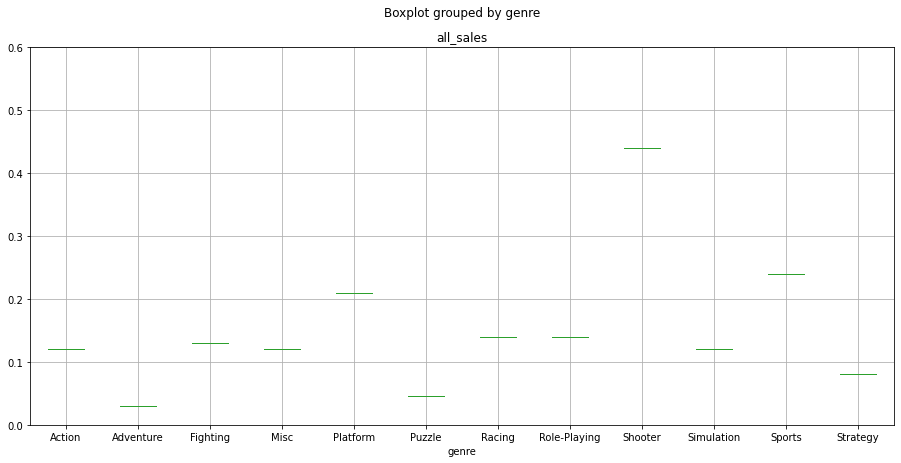

In [74]:
data.pivot_table(index='genre', values='all_sales', aggfunc='median') \
.boxplot(column = 'all_sales', by = 'genre', figsize=(15, 7)).set_ylim(0, 0.6)

# 4. Портрет пользователя по регионам

# 4.1 Топ-5 по популярности платформ

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Популярность оценивать будем по продажам

In [75]:
# Северная Америка

data.groupby('platform').agg({'na_sales':['sum']}).sort_values(('na_sales', 'sum'), ascending = False).head()

,na_sales
,sum
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


array([<AxesSubplot:ylabel='(na_sales, sum)'>], dtype=object)

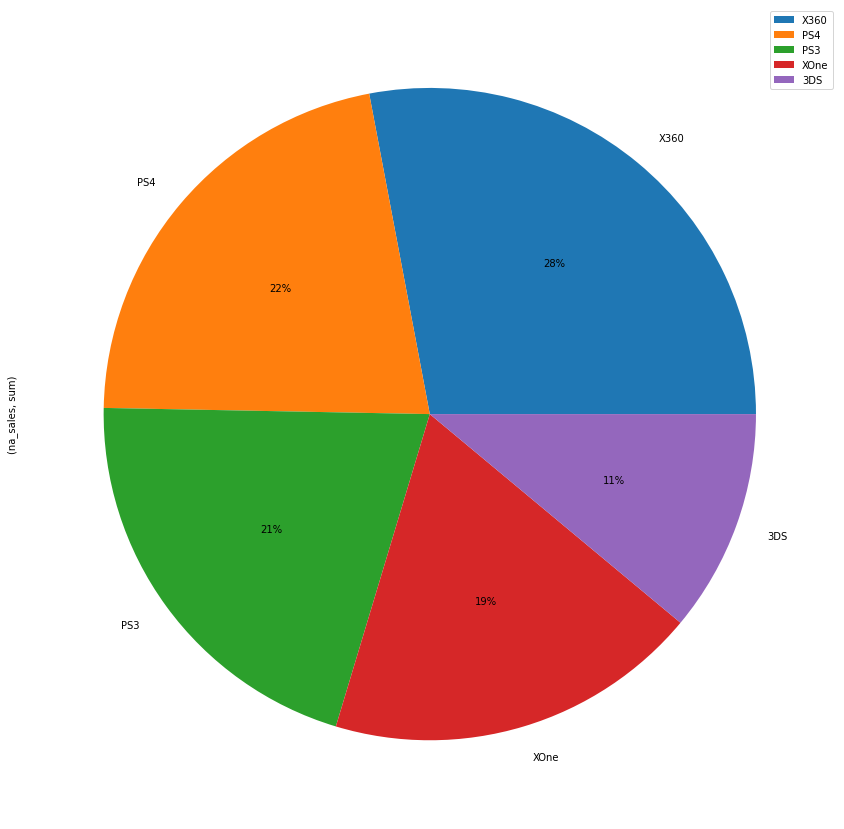

In [76]:
data.groupby('platform').agg({'na_sales':['sum']}).sort_values(('na_sales', 'sum'), ascending = False).head() \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

In [77]:
# Европа

data.groupby('platform').agg({'eu_sales':['sum']}).sort_values(('eu_sales', 'sum'), ascending = False).head()

,eu_sales
,sum
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


array([<AxesSubplot:ylabel='(eu_sales, sum)'>], dtype=object)

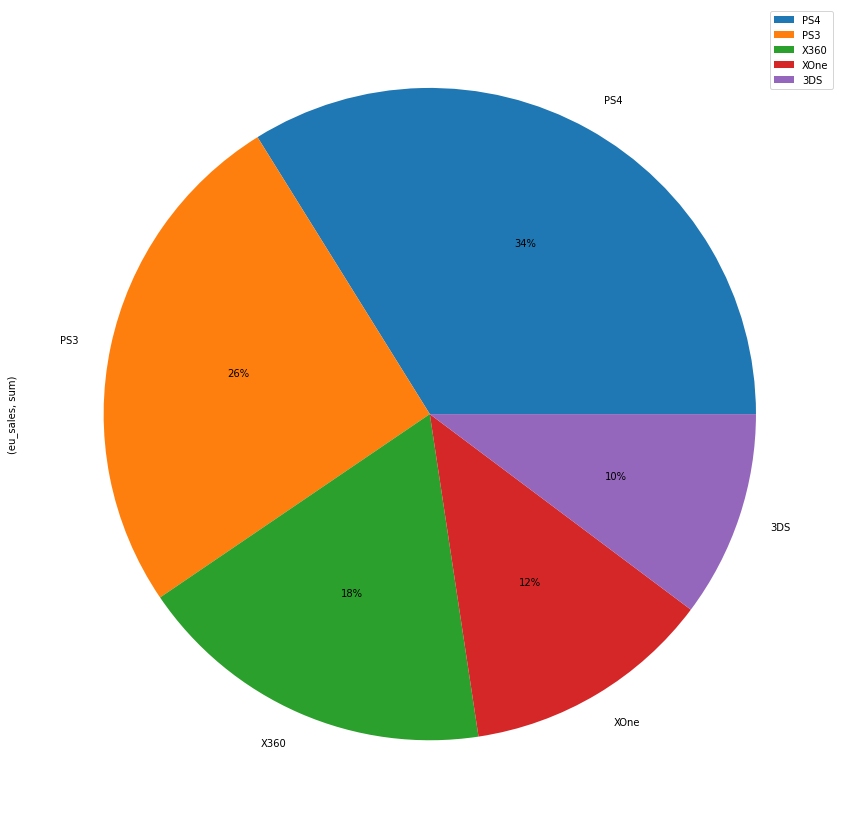

In [78]:
data.groupby('platform').agg({'eu_sales':['sum']}).sort_values(('eu_sales', 'sum'), ascending = False).head()  \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

array([<AxesSubplot:ylabel='(jp_sales, sum)'>], dtype=object)

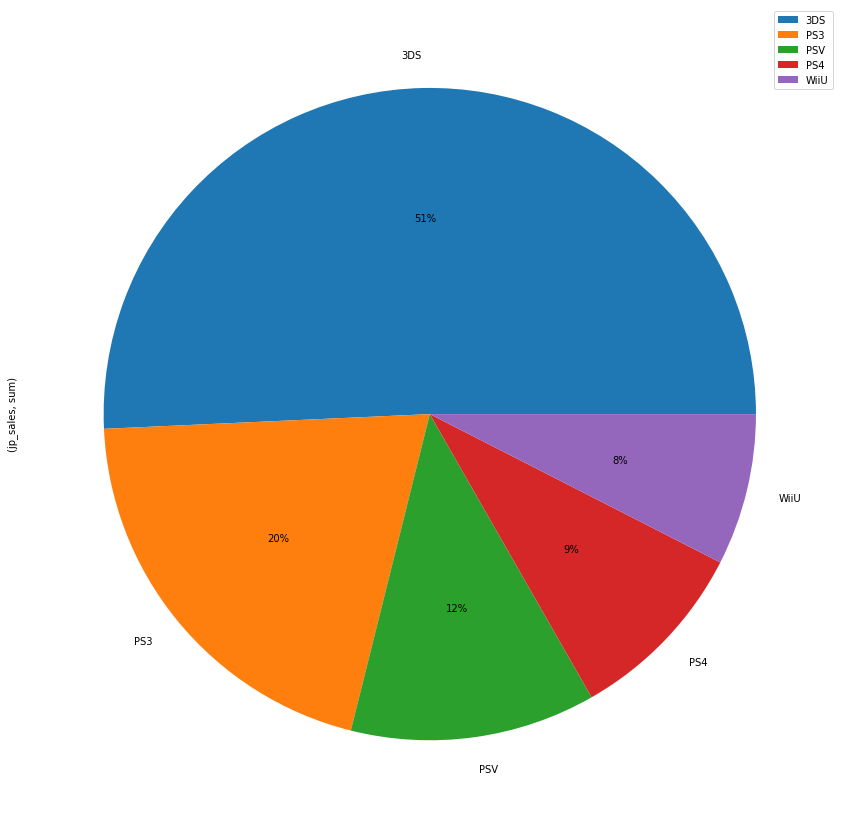

In [79]:
# Япония

data.groupby('platform').agg({'jp_sales':['sum']}).sort_values(('jp_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

In [80]:
data.groupby('platform').agg({'jp_sales':['sum']}).sort_values(('jp_sales', 'sum'), ascending = False).head() 

,jp_sales
,sum
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [81]:
# Другие страны

data.groupby('platform').agg({'other_sales':['sum']}).sort_values(('other_sales', 'sum'), ascending = False).head()

,other_sales
,sum
platform,
PS4,48.35
PS3,43.26
X360,20.40
XOne,14.27
3DS,8.87


array([<AxesSubplot:ylabel='(other_sales, sum)'>], dtype=object)

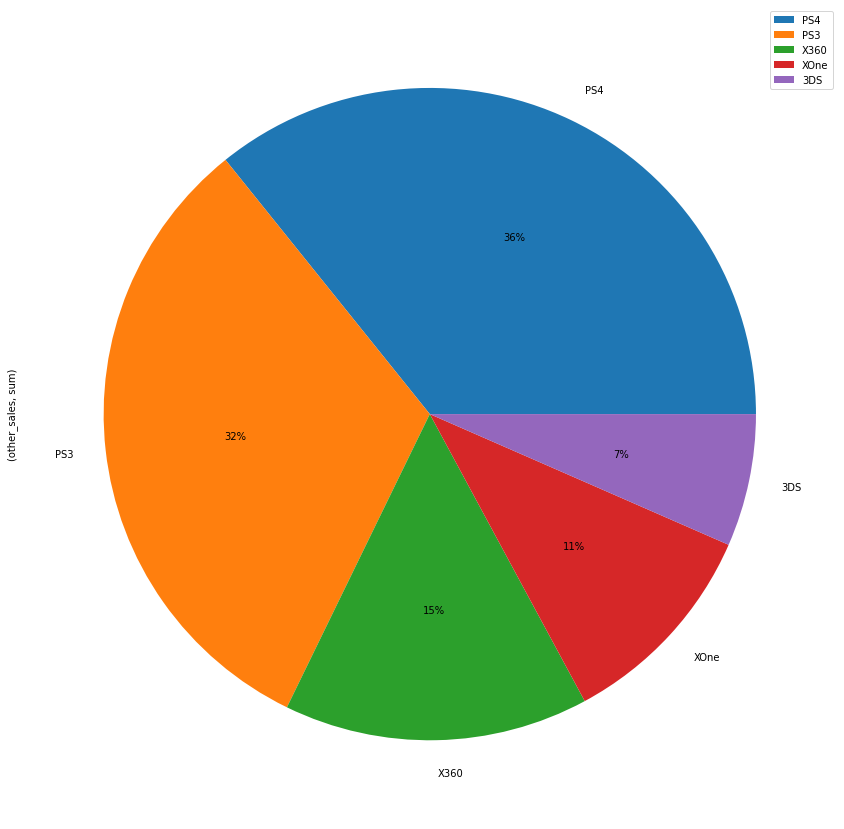

In [82]:
data.groupby('platform').agg({'other_sales':['sum']}).sort_values(('other_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>В 4-х регионах разные платформы пользуются наибольшим спросом, если считать его по кол-ву купленных игр на данную платформу. Что примечательно, так это то, что PS 3 и 4 взяли высокие места во всех рассмотренных регионах

# 4.2 Топ-5 по популярности жанров

In [83]:
# Северная Америка

data.groupby('genre').agg({'na_sales':['sum']}).sort_values(('na_sales', 'sum'), ascending = False).head()

,na_sales
,sum
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


array([<AxesSubplot:ylabel='(na_sales, sum)'>], dtype=object)

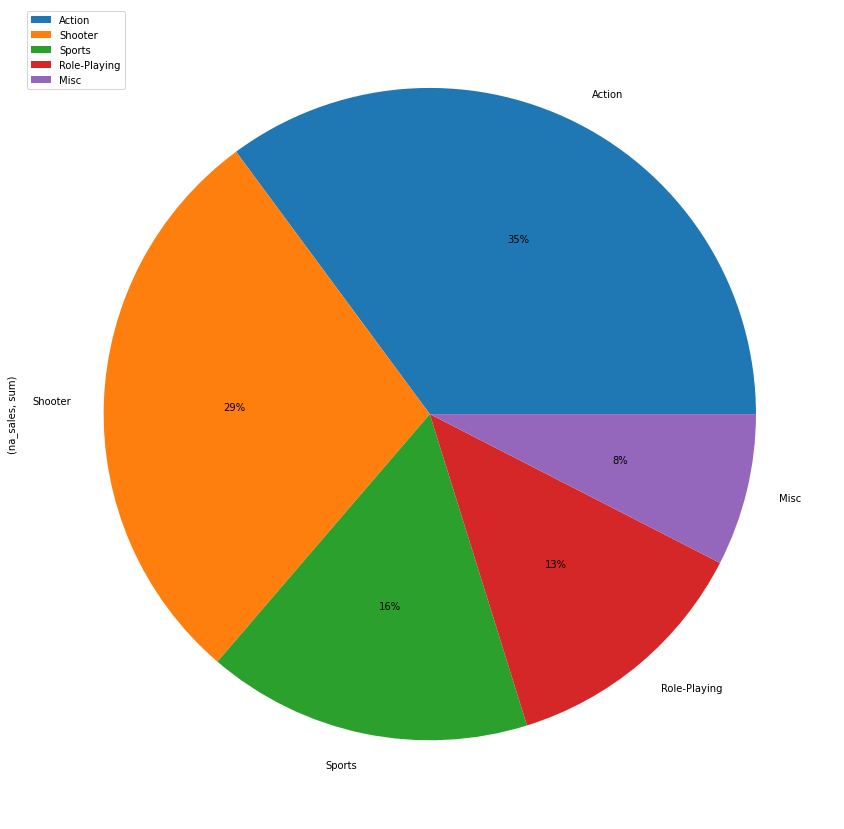

In [84]:
data.groupby('genre').agg({'na_sales':['sum']}).sort_values(('na_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

In [85]:
# Европа

data.groupby('genre').agg({'eu_sales':['sum']}).sort_values(('eu_sales', 'sum'), ascending = False).head()

,eu_sales
,sum
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


array([<AxesSubplot:ylabel='(eu_sales, sum)'>], dtype=object)

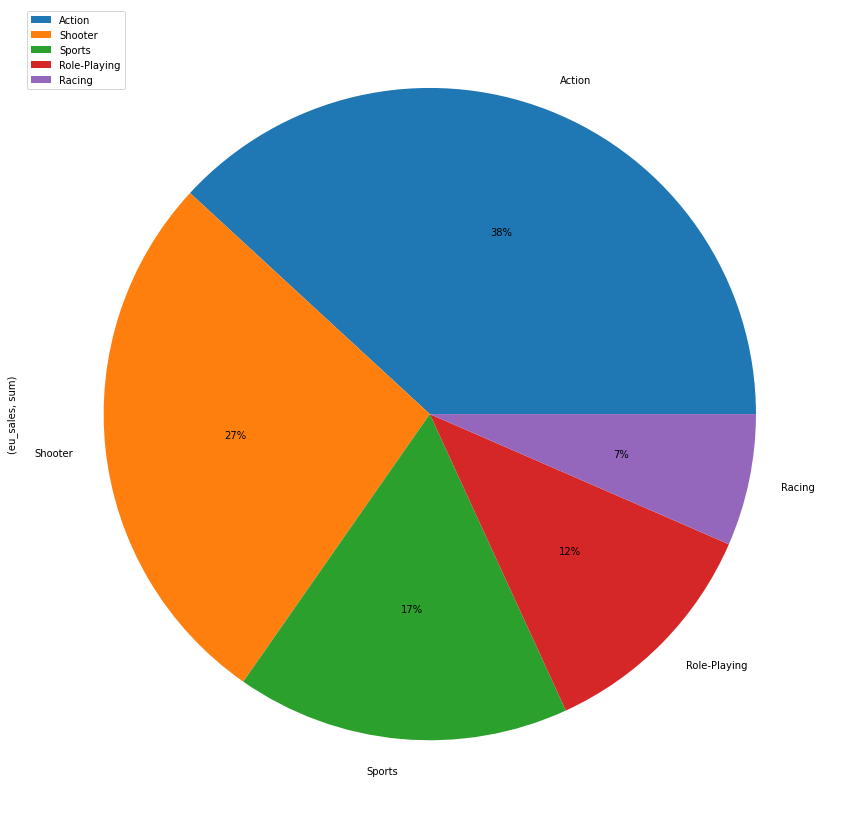

In [86]:
data.groupby('genre').agg({'eu_sales':['sum']}).sort_values(('eu_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

In [87]:
# Япония

data.groupby('genre').agg({'jp_sales':['sum']}).sort_values(('jp_sales', 'sum'), ascending = False).head()

,jp_sales
,sum
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


array([<AxesSubplot:ylabel='(jp_sales, sum)'>], dtype=object)

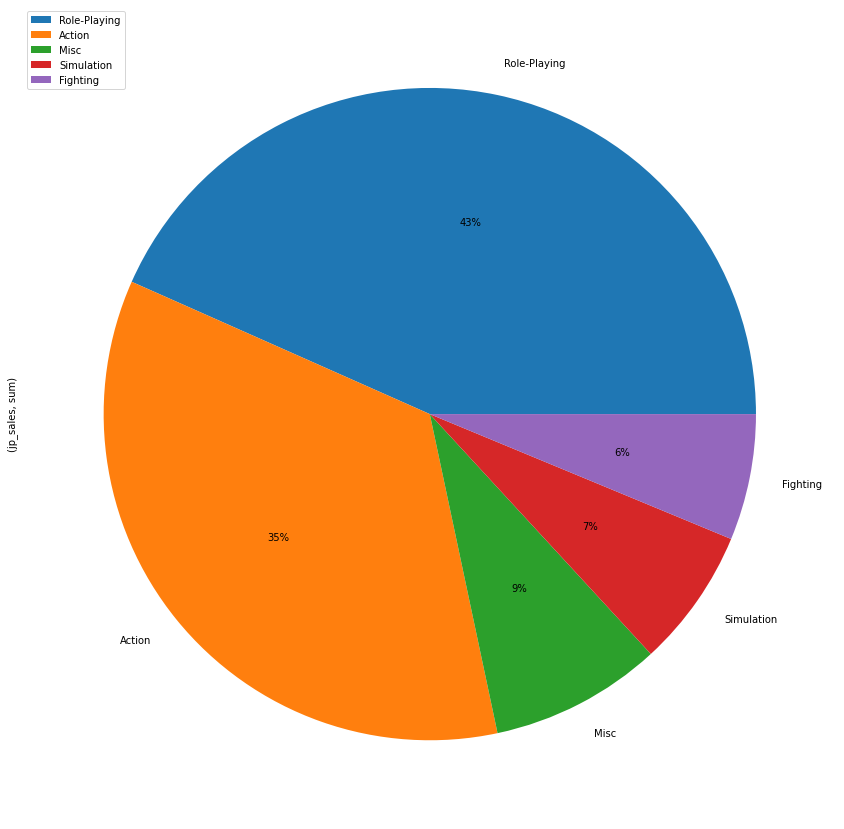

In [88]:
data.groupby('genre').agg({'jp_sales':['sum']}).sort_values(('jp_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

In [89]:
# Другие страны

data.groupby('genre').agg({'other_sales':['sum']}).sort_values(('other_sales', 'sum'), ascending = False).head()

,other_sales
,sum
genre,
Action,51.14
Shooter,37.26
Sports,22.44
Role-Playing,14.83
Misc,7.67


array([<AxesSubplot:ylabel='(other_sales, sum)'>], dtype=object)

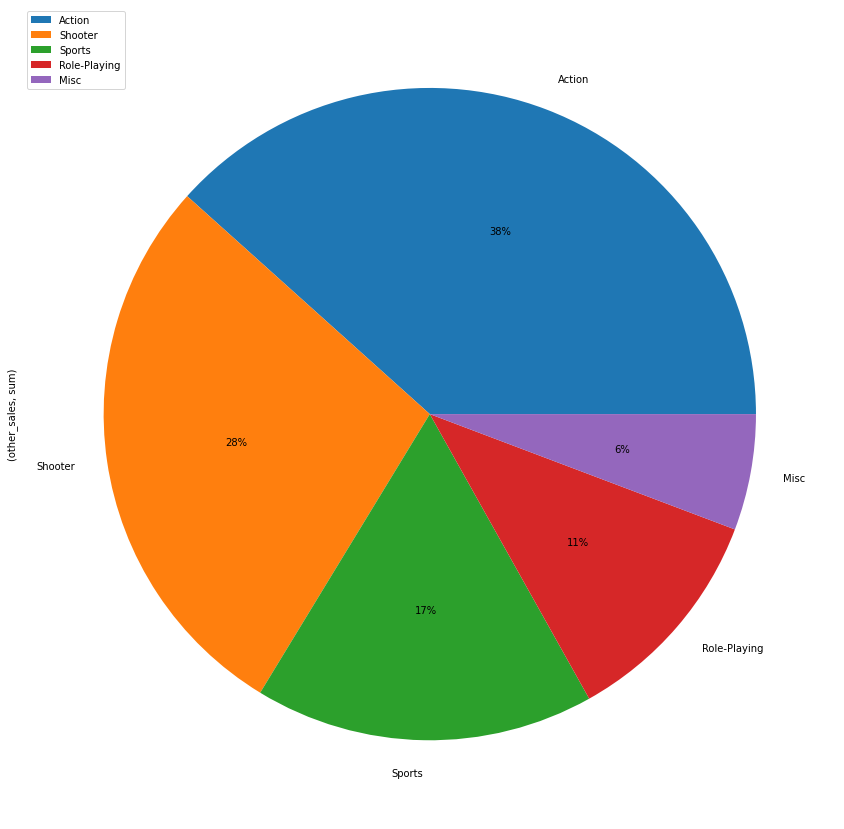

In [90]:
data.groupby('genre').agg({'other_sales':['sum']}).sort_values(('other_sales', 'sum'), ascending = False).head()   \
.plot(kind='pie', subplots=True, figsize=(15,15), autopct='%1.0f%%')

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'> В Северной Америке, Европе и других странах (кроме Японии) лидируют жанр action и shooter, а в Японии - Role playing, следом action, а shooter даже в топ-5 не попал, зато есть файтинг. Стрелялки японцев не интересуют, только драки

# 4.3 Влияние рейтинга ESRB

In [91]:
#data['rating'].unique()

In [92]:
#data['rating'].isna().sum() / len(data['rating'])

<div class="alert alert-info">
<font size="4", color= "black"><b>Пояснение</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Интернет пишет следующее:

1. EC - для самых маленьких, тех, кто только научился держать джойстик.
2. Е - базовый рейтинг для всех возрастов.
3. Е10+ - для детей от 10 лет.
4. K-A - то же, что и Е. В 1998 был переименован в Е.
5. Т - для подростков от 13 лет.
6. М - от 17 лет.
7. АО - 18+ лет, самые жесткие игры.
8. RP - ожидание рейтинга. Появлятеся с рекламой игр, которые еще не оценили

In [93]:
#data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'M'),
  Text(1, 0, 'E'),
  Text(2, 0, 'Рейтинг не определен'),
  Text(3, 0, 'E10+'),
  Text(4, 0, 'T')])

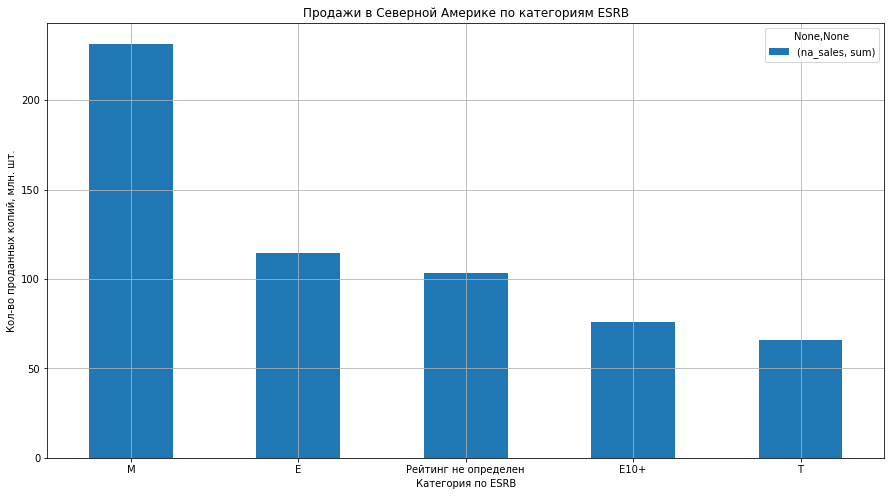

In [94]:
data.groupby('rating').agg({'na_sales':['sum']}) \
.sort_values(('na_sales', 'sum'), ascending = False).plot(kind='bar', 
                                                          grid=True, figsize=(15, 8), 
                                                          xlabel = 'Категория по ESRB',
                                                          ylabel = 'Кол-во проданных копий, млн. шт.',
                                                          title = 'Продажи в Северной Америке по категориям ESRB')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'M'),
  Text(1, 0, 'E'),
  Text(2, 0, 'Рейтинг не определен'),
  Text(3, 0, 'E10+'),
  Text(4, 0, 'T')])

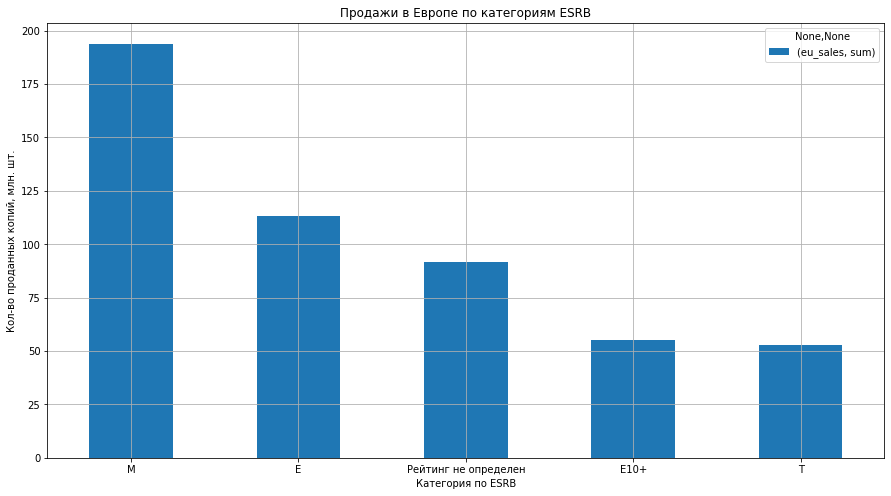

In [95]:
data.groupby('rating').agg({'eu_sales':['sum']}) \
.sort_values(('eu_sales', 'sum'), ascending = False).plot(kind='bar', 
                                                          grid=True, figsize=(15, 8), 
                                                          xlabel = 'Категория по ESRB',
                                                          ylabel = 'Кол-во проданных копий, млн. шт.',
                                                          title = 'Продажи в Европе по категориям ESRB')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Рейтинг не определен'),
  Text(1, 0, 'E'),
  Text(2, 0, 'T'),
  Text(3, 0, 'M'),
  Text(4, 0, 'E10+')])

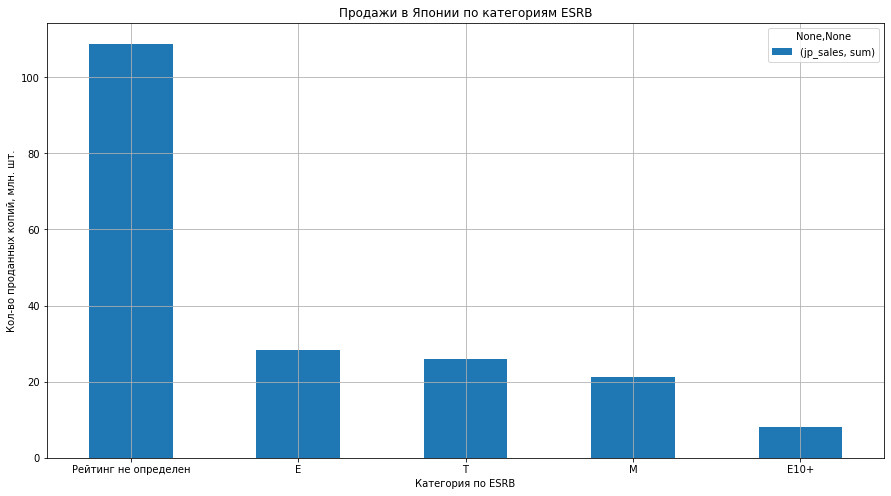

In [96]:
data.groupby('rating').agg({'jp_sales':['sum']}) \
.sort_values(('jp_sales', 'sum'), ascending = False).plot(kind='bar', 
                                                          grid=True, figsize=(15, 8), 
                                                          xlabel = 'Категория по ESRB',
                                                          ylabel = 'Кол-во проданных копий, млн. шт.',
                                                          title = 'Продажи в Японии по категориям ESRB')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'M'),
  Text(1, 0, 'E'),
  Text(2, 0, 'Рейтинг не определен'),
  Text(3, 0, 'T'),
  Text(4, 0, 'E10+')])

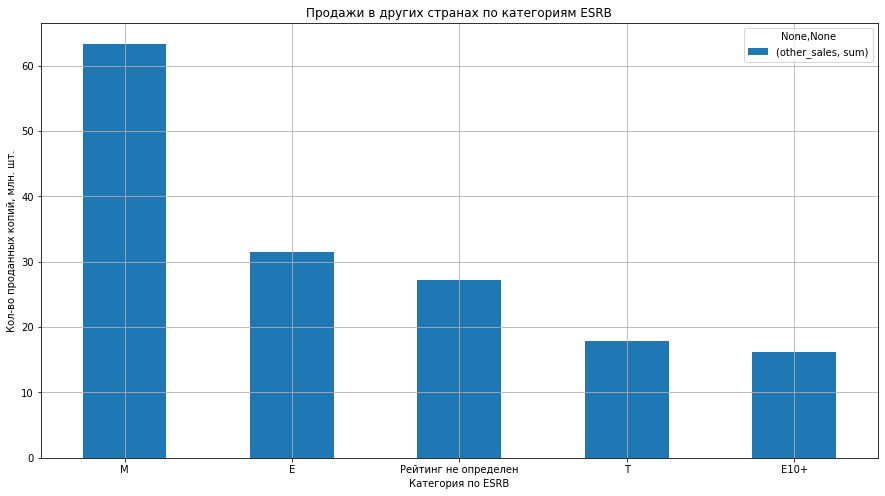

In [97]:
data.groupby('rating').agg({'other_sales':['sum']}) \
.sort_values(('other_sales', 'sum'), ascending = False).plot(kind='bar', 
                                                          grid=True, figsize=(15, 8), 
                                                          xlabel = 'Категория по ESRB',
                                                          ylabel = 'Кол-во проданных копий, млн. шт.',
                                                          title = 'Продажи в других странах по категориям ESRB')
plt.xticks(rotation=0)

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'> Маркировка игр по категориям приемлемых возрастов есть не везде, даже в Северной Америке, откуда родом она идет, не по всем играм она заполнена. Особенно много игр без указания категории в Японии

# 5. Проверка гипотез

Итак, две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action и Sports разные.

# Гипотеза № 1

Формулируем нулевую и альтернативную гипотезы для данного случая:
<br>- Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>- Альтернативная гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [99]:
data.query('platform == "XOne" & user_score.notna()')['user_score']

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [100]:
xbox_sample = data.query('platform == "XOne" & user_score.notna()')['user_score']
pc_sample = data.query('platform == "PC" & user_score.notna()')['user_score']   

In [101]:
alpha = 0.05

In [102]:
results = st.ttest_ind(xbox_sample, pc_sample)
print('p-значение', results.pvalue)

p-значение 0.5535080500643661


In [103]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'> Отвергнуть нулевую гипотезу не получилось, следовательно, пользовательские рейтинги XBox и PC одинаковые

# Гипотеза № 2

Формулируем нулевую и альтернативную гипотезы для данного случая:
<br>- Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
<br>- Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action и Sports разные

In [104]:
data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [105]:
action_sample = data.query('genre == "Action" & user_score.notna()')['user_score']
sports_sample = data.query('genre == "Sports" & user_score.notna()')['user_score']   

In [106]:
alpha = 0.05

In [107]:
results = st.ttest_ind(action_sample, sports_sample)
print('p-значение', results.pvalue)

p-значение 3.7163089460934874e-26


In [108]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'> Нулевая гипотеза отвергнута, следовательно, пользовательские рейтинги жанров Action и Sports различаются

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'> Для проверки гипотез был выбран t-тест, т.к. он наиболее подходит для проверки средних двух генеральных совокупностей, что по сути и является средним пользовательским рейтингом

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'> Отвергнуть нулевую гипотезу не получилось, следовательно, пользовательские рейтинги XBox и PC одинаковые

In [109]:
# Проверка

print('Средний рейтинг платформы Xbox One:', data.query('platform == "XOne" & user_score.notna()')['user_score'].mean())
print('Средний рейтинг платформы PC:', data.query('platform == "PC" & user_score.notna()')['user_score'].mean())
print(' ')
print('Средний рейтинг жанра Action:', data.query('genre == "Action" & user_score.notna()')['user_score'].mean())
print('Средний рейтинг жанра Sports:', data.query('genre == "Sports" & user_score.notna()')['user_score'].mean())

Средний рейтинг платформы Xbox One: 6.521428571428572
Средний рейтинг платформы PC: 6.4286407766990274
 
Средний рейтинг жанра Action: 6.825047801147227
Средний рейтинг жанра Sports: 5.455897435897437


# 6. Вывод

<br> У каждой платформы были свои годы успеха, длившиеся несколько лет. Из крупных платформ последней успешной являлась PS4.
<br> До конца 2000-х годов игр выпускалось существенно больше, чем сейчас. Мое предположение - часть рынка отвоевали мобильные игры.
<br> Вкусовые в плане жанров игр препочтения японцев сильно отличаются от всех остальных регионов.
<br> Связи между отзывами игроков и оценками критиков и общими продажами не найдено. Критики чуть более лояльны в своих оценках, чем пользователи.
<br> У каждой рассмотренной нами платформой были игры-чемпионы, которые сильно вырвались вперед в плане количества проданных экземпляров.
<br> Игроки в целом любят жесткие (но не чересчур) игры.
<br> Исходя из вышеобозначенного можно сделать вывод, что пытаться предсказать какая платформа будет успешна в будущем - бесполезно. Одна супер-успешная игра может потянуть за собой всю статистику по платформе, на которой она была сделана. При этом надо учитывать сопернический рынок в лице мобильных устройств и приложений на них, которые постоянно развиваются. Можно разве что сказать, что очередная PS или XBox будут людям явно интереснее, как минимум, за счет громкого имени бренда.